In [2]:
import json

# Load the JSON file with sentiment results
with open('sentiment.json', 'r') as file:
    reviews = json.load(file)

In [ ]:
# Check and display results for each review
for review in reviews:
    print(f"Title: {review['title_cleaned']}")
    print(f"Text: {review['text_cleaned']}")
    print(f"Date: {review['date_cleaned']}")
    print(f"Verified Purchase: {review['verified_purchase_bool']}")
    print(f"Helpful Votes: {review['helpful_votes_count']}")
    print(f"Sentiment: {review['sentiment_stars']} stars (Confidence: {review['sentiment_score']:.3f})")
    print("---")

# Optional: Summary statistics
total_reviews = len(reviews)
star_counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
for review in reviews:
    stars = review['sentiment_stars']
    if stars is not None:  # Skip if sentiment failed (None)
        star_counts[stars] += 1

# Print summary
print("Summary of Sentiment Results:")
print(f"Total Reviews: {total_reviews}")
for stars, count in star_counts.items():
    percentage = (count / total_reviews) * 100 if total_reviews > 0 else 0
    print(f"{stars} Star(s): {count} reviews ({percentage:.1f}%)")

# Optional: Average sentiment score
valid_scores = [r['sentiment_score'] for r in reviews if r['sentiment_score'] is not None]
average_score = sum(valid_scores) / len(valid_scores) if valid_scores else 0
print(f"Average Confidence Score: {average_score:.3f}")

Title: amazons's basics 3-button usb wired mouse, works good, looks good, reduces the emf
Text: this amazon basics 3-button usb wired mouse is easy to review. it was delivered in a solid, well protected box. installing it was easy. it fit well, functions well, is responsive, and the design reminds me of when computer mouses were first introduced, so the familiarity is refreshing. it tracks well, without too fast or slow a speed and doesn't need batteries. i bought it because it is wired and helps reduce the emf around the computer from 20 mg with a wireless mouse to 0 mg for this one.
Date: 2025-05-16
Verified Purchase: True
Helpful Votes: 2
Sentiment: 5 stars (Confidence: 0.690)
---
Title: quick and easy
Text: this is simply wonderful. all of a sudden one day, i was unable to scroll with my mouse. what a pain! i'd had that one for 2 years maybe. i'd say i got my money's worth. i ordered the same one and it was here in one or two days, couldn't get any simpler.
Date: 2025-05-28
Verifie

In [4]:
import pandas as pd

In [11]:
df = pd.DataFrame(reviews)

# Display the DataFrame
print("DataFrame of Sentiment Results:")
print(df)
print("\n---\n")

# Optional: Summary statistics
print("Summary of Sentiment Results:")
total_reviews = len(df)
star_counts = df['sentiment_stars'].value_counts().sort_index()
for stars, count in star_counts.items():
    percentage = (count / total_reviews) * 100 if total_reviews > 0 else 0
    print(f"{stars} Star(s): {count} reviews ({percentage:.1f}%)")

# Average confidence score
average_score = df['sentiment_score'].mean() if not df['sentiment_score'].isna().all() else 0
print(f"Average Confidence Score: {average_score:.3f}")

# Optional: Save DataFrame to CSV for further use
df.to_csv('reviews_with_bert_sentiment.csv', index=False)
print("\nDataFrame saved to 'reviews_with_bert_sentiment.csv'")

DataFrame of Sentiment Results:
                                                title  rating  \
0   Amazons's Basics 3-Button USB wired mouse, wor...  rating   
1                                      Quick and easy  rating   
2                            Perfect Old School Mouse  rating   
3            no-nonsense mouse without spending a lot  rating   
4                         Cheaper Is Sometimes Better  rating   
..                                                ...     ...   
95                                        Lightweight  rating   
96  Reliable, Comfortable, and Great Value for a W...  rating   
97                                      Really budget  rating   
98                                   Excellent mouse!  rating   
99            They didn't like when they said 'basic'  rating   

                                                 text    reviewer_name  \
0   This Amazon Basics 3-Button USB wired mouse is...        Coopra102   
1   This is simply wonderful. All of a 

In [7]:
df.head(5)

,title,rating,text,reviewer_name,date,verified_purchase,helpful_votes,title_cleaned,text_cleaned,date_cleaned,verified_purchase_bool,helpful_votes_count,rating_processed,sentiment_stars,sentiment_score
0,"Amazons's Basics 3-Button USB wired mouse, wor...",rating,This Amazon Basics 3-Button USB wired mouse is...,Coopra102,"Reviewed in the United States on May 16, 2025",Yes,2 people found this helpful,"amazons's basics 3-button usb wired mouse, wor...",this amazon basics 3-button usb wired mouse is...,2025-05-16,True,2,rating,5,0.689857
1,Quick and easy,rating,This is simply wonderful. All of a sudden one ...,zentrainer,"Reviewed in the United States on May 28, 2025",Yes,0,quick and easy,this is simply wonderful. all of a sudden one ...,2025-05-28,True,0,rating,5,0.773189
2,Perfect Old School Mouse,rating,"Honestly, I'm too old school to use a wireless...",Kevin R,"Reviewed in the United States on June 3, 2025",Yes,0,perfect old school mouse,"honestly, i'm too old school to use a wireless...",2025-06-03,True,0,rating,5,0.597490
3,no-nonsense mouse without spending a lot,rating,Overview: The Amazon Basics Responsive and Pre...,Lissa R,"Reviewed in the United States on January 15, 2025",Yes,3 people found this helpful,no-nonsense mouse without spending a lot,overview: the amazon basics responsive and pre...,2025-01-15,True,3,rating,4,0.783606
4,Cheaper Is Sometimes Better,rating,Basic mouse for a nice laptop. I had spent a b...,Makayla Kitt,"Reviewed in the United States on May 18, 2025",Yes,One person found this helpful,cheaper is sometimes better,basic mouse for a nice laptop. i had spent a b...,2025-05-18,True,0,rating,4,0.625299


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

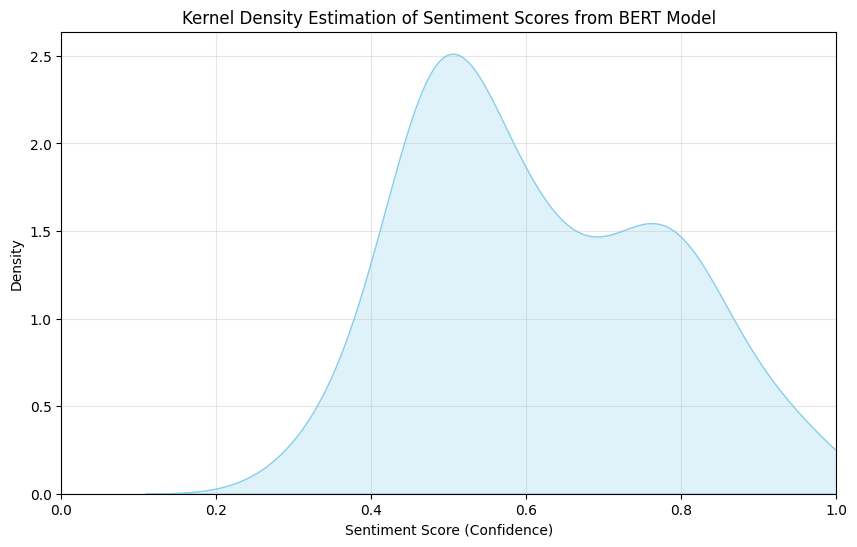

In [10]:
df_valid = df[df['sentiment_score'].notna()]

# Check if there are valid sentiment scores to plot
if df_valid.empty:
    print("No valid sentiment scores found to plot.")
else:
    # Create the KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df_valid, x='sentiment_score', fill=True, color='skyblue')
    plt.title('Kernel Density Estimation of Sentiment Scores from BERT Model')
    plt.xlabel('Sentiment Score (Confidence)')
    plt.ylabel('Density')
    plt.xlim(0, 1)  # Sentiment scores range from 0 to 1
    plt.grid(True, alpha=0.3)
    
    # Show the plot
    plt.show()

    # Optional: Save the plot to a file
    # plt.savefig('sentiment_score_kde.png')
    # print("KDE plot saved to 'sentiment_score_kde.png'")